## Lab Exercise_1 - Descriptive Statistical Data Analysis

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the customer tip dataset and print the first five observations

In [2]:
# type your code here
cust_tip_df = pd.read_csv('customer_tip.csv')
print(cust_tip_df.shape )
cust_tip_df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

### 1. Print the column names of categorical and numerical variables in the data


In [3]:
# type your code here
cat_cols = [col for col in cust_tip_df.columns if cust_tip_df[col].dtype=="O"]
num_cols = [col for col in cust_tip_df.columns if cust_tip_df[col].dtype!="O"]
print("The categorical columns are {}".format(cat_cols)) 
print("The numerical columns are {}".format(num_cols)) 

The categorical columns are ['sex', 'smoker', 'day', 'time']
The numerical columns are ['total_bill', 'tip', 'size']


### 2. Print the average value of Total bill amount and tips

In [4]:
# type your code
col_lst=['total_bill', 'tip']
cust_tip_df[col_lst].mean().to_frame(name='Average')

,Average
total_bill,19.785943
tip,2.998279


### 3. Compute the average bill amount for each day


In [5]:
# type your code here
cust_tip_df.groupby('day').agg(Total_Bill_Avg=('total_bill','mean'))

,Total_Bill_Avg
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


Sunday has the highest average total bill amount. And the second highest is Saturday. People spend more at restaurants on the weekends.

### 4. Which gender is more generous in giving the tip?</b>


In [6]:
# type your code here
cust_tip_df.groupby('sex', as_index=False).agg(Tip_Avg=('tip','median'))

,sex,Tip_Avg
0,Female,2.75
1,Male,3.00


The median tip for male is 3 and female is 2.75. Hence Male are slightly more generous in giving tips.

### 5. According to the data, were there more customers for dinner or lunch? </b>


In [7]:
# type your code here
cust_tip_df.groupby('time').agg(NoOfCustomers=('size','sum'))

,NoOfCustomers
time,
Dinner,463
Lunch,164


There were more customers for dinner. People choose to dine at the restaurant more during dinner time.

### 6. comment on the variable 'tip' based on its measure of dispersion 

<AxesSubplot:>

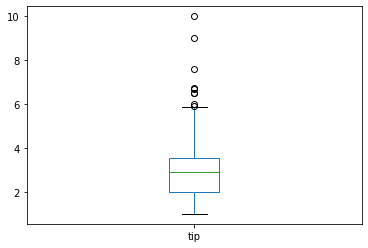

In [8]:
cust_tip_df['tip'].plot(kind='box')

Tip seems to have outliers hence IQR could be the best choice for measure the dispersion

In [9]:
cust_tip_df['tip'].median()

2.9

In [10]:
cust_tip_df['tip'].quantile([0.25,0.75])

0.25    2.0000
0.75    3.5625
Name: tip, dtype: float64

Tips has a median of 2.9 with the range of middle half of the data being between 2 to 3.6.

### 7. Compare the deviation of Numerical variables and comment which feature is having more deviation

In [11]:
# select only the numerical columns
num_data = cust_tip_df.select_dtypes(include=np.number)

# define function to calculate Coefficient of Variance
cv = lambda x: np.std(x) / np.mean(x)

# calculate the Coefficient of Variance
num_data.apply(cv).to_frame(name='coeff_var')

,coeff_var
total_bill,0.449013
tip,0.460531
size,0.369366


Tip is more dispersed around the mean than Total Bill and Size. And Total Bill is more dispersed around the mean than size.

### 8. Plot the distribution of bill amount and tip and comment about its normality

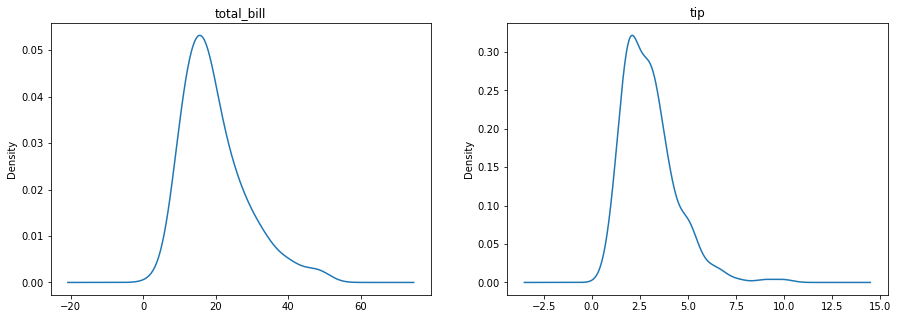

In [12]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
for i,col in enumerate(cust_tip_df[['total_bill','tip']]):
    cust_tip_df[col].plot(kind='kde', ax=axes[i])
    axes[i].title.set_text(col)
plt.show()

The plots are righ-skewed.

In [13]:
measures_df = pd.DataFrame()
measures_df = measures_df.append(cust_tip_df[['total_bill','tip']].mean().to_frame(name='mean').T)
measures_df=measures_df.append(cust_tip_df[['total_bill','tip']].median().to_frame(name='median').T)
mode_df = cust_tip_df[['total_bill','tip']].mode()
mode_df.index=['mode']
measures_df = measures_df.append(mode_df)
measures_df

,total_bill,tip
mean,19.785943,2.998279
median,17.795000,2.900000
mode,13.420000,2.000000


The mean, median and mode are not same.

In [14]:
cust_tip_df[['total_bill','tip']].skew().to_frame(name='skewness')

,skewness
total_bill,1.133213
tip,1.465451


Skewness is close to 0 for normal distribution. Here the skewness is > 1.

In [15]:
# Shapiro-Wilk Test
for col in cust_tip_df[['total_bill','tip']]:
    stat, p = stats.shapiro(cust_tip_df[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('{} looks Gaussian (fail to reject H0)'.format(col))
    else:
        print('{} does not look Gaussian (reject H0)'.format(col))
        print('-'*50)

Statistics=0.920, p=0.000
total_bill does not look Gaussian (reject H0)
--------------------------------------------------
Statistics=0.898, p=0.000
tip does not look Gaussian (reject H0)
--------------------------------------------------


1. The mean, median and mode are not same.
2. The skewness is > 1 for both meaning both are highly right-skewed
3. The shapiro-wilk test also fails for both total bill and tips. 

Hence they are not normally distributed. 

### 9. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


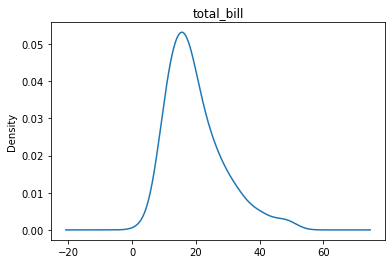

In [16]:
# type your code here
cust_tip_df['total_bill'].plot(kind='kde')
plt.title('total_bill')
plt.show()

In [17]:
cust_tip_df['total_bill'].skew()

1.1332130376158205

Yes, Total Bill is skewed and it is righ-skewed. Sknewness > 1 indicates it is highly skewed.

### 10. Apply the suitable transformation to reduce the skew of the variable "total_bill"

In [18]:
total_bill_log = np.log(cust_tip_df['total_bill']) 
total_bill_log.name = 'log'
total_bill_sqrt = np.sqrt(cust_tip_df['total_bill']) 
total_bill_sqrt.name = 'sqrt'
total_bill_power = np.power(cust_tip_df['total_bill'],0.1) 
total_bill_power.name = 'power.1'
total_bill_boxcox = pd.Series(stats.boxcox(cust_tip_df['total_bill'])[0], name='boxcox')
print("The skewness after applying log transform is %.2f" % total_bill_log.skew())
print("The skewness after applying sqrt transform is %.2f" % total_bill_sqrt.skew())
print("The skewness after applying boxcox transform is %.2f" % total_bill_boxcox.skew())         
print("The skewness after applying 0.1 power is %.2f" % total_bill_power.skew())    

The skewness after applying log transform is -0.12
The skewness after applying sqrt transform is 0.57
The skewness after applying boxcox transform is 0.00
The skewness after applying 0.1 power is 0.04


BoxCox Transformation is the most suitable Transformation with skewness almost 0. The next suitable transformation is to the power of 0.1

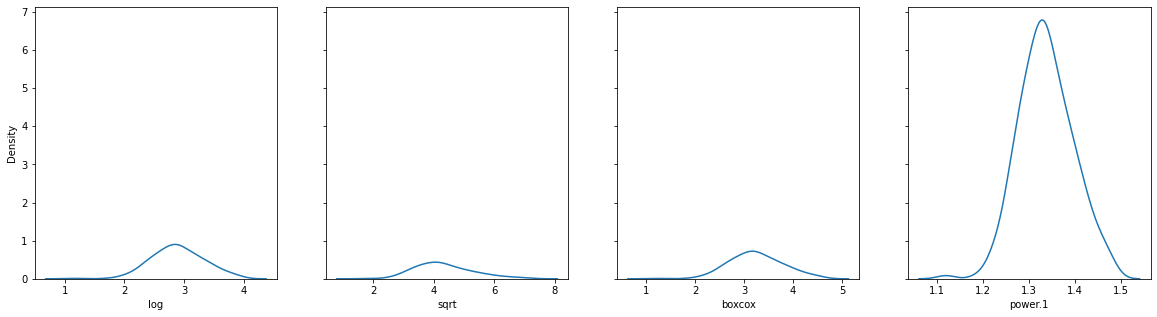

In [19]:
# plots after transformation
total_bill_transform_df = pd.concat([total_bill_log,total_bill_sqrt,total_bill_boxcox, total_bill_power],axis=1)
fig,axes = plt.subplots(1,4,figsize=(20,5),sharey=True)
for i,col in enumerate(total_bill_transform_df):
    sns.kdeplot(x=total_bill_transform_df[col], ax=axes[i])
plt.show()

### 11. Analyze the relation between bill_amount and tips

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

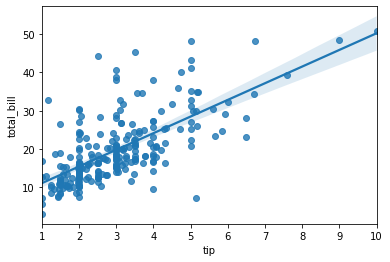

In [20]:
sns.regplot(x='tip', y='total_bill', data=cust_tip_df)

In [21]:
stats.pearsonr(cust_tip_df['tip'], cust_tip_df['total_bill'])

(0.6757341092113645, 6.692470646863477e-34)

[0-0.19 - very weak, 0.2-0.39 - weak, 0.40-0.59 - moderate, 0.6-0.79 - strong, 0.8-1 - very strong correlation]

There is a strong positive linear correlation between tips and total bill

### 12. Find the covaraiance and correlation between bill_amount and tips. Infer the results

In [22]:
covar = np.cov(cust_tip_df['tip'], cust_tip_df['total_bill'])[0,1]
print('The covariance of total bill amount and tips is %.2f' % covar)

The covariance of total bill amount and tips is 8.32


In [23]:
corr,_ = stats.pearsonr(cust_tip_df['tip'], cust_tip_df['total_bill'])
print('The correlation of total bill amount and tips is %.2f' % corr)

The correlation of total bill amount and tips is 0.68


A positive covariance indicates there is positive relationship between tips and total bill ie as the total bill increases the tips also increases. 

To determine the strength of this positive relationship we compute the correlation. The correlation coefficient is between 0.6 and 0.8, which indicates there is a strong positive linear relationship between them.

### 13. Analyze the relation between bill_amount, tips and sex

#### Scatter Plot

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

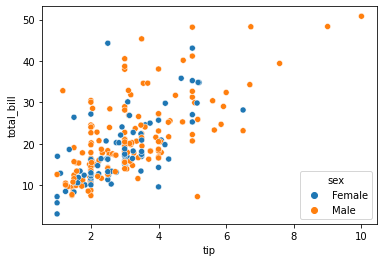

In [24]:
sns.scatterplot(x='tip', y='total_bill', hue='sex', data=cust_tip_df)

In general there is not much difference between the total bill and tip relationship based on sex. 

Sometimes males pay extremely high bill amount and also provide extremely high tips.

And sometimes mostly males, though they pay high bill amounts, they provide less tips.

### 14. Find the average number of customer for dinner and Lunch for each day 

In [25]:
summary_df = cust_tip_df.groupby(['day','time'], as_index=False).agg(AvgSizeofCustomers=('size','mean'))
summary_df.pivot(index='day',columns='time')

AvgSizeofCustomers          
time             Dinner     Lunch
day                              
Fri            2.166667  2.000000
Sat            2.517241       NaN
Sun            2.842105       NaN
Thur           2.000000  2.459016

The average size of customers for Dinner on Sundays is the highest.



### 15. Find the average bill-amount  for dinner and Lunch for each day

In [26]:
summary_df=cust_tip_df.groupby(['day','time'], as_index=False).agg(AvgBillAmount=('total_bill','mean'))
summary_df.pivot(index='day', columns='time')

AvgBillAmount           
time        Dinner      Lunch
day                          
Fri      19.663333  12.845714
Sat      20.441379        NaN
Sun      21.410000        NaN
Thur     18.780000  17.664754

The average Total bill amount is the highest at Dinner time on Sundays.

The average Total bill amount is the lowest at Lunch time on Fridays.

### 16. Comment about the tips given by the smokers

<AxesSubplot:xlabel='smoker', ylabel='tip'>

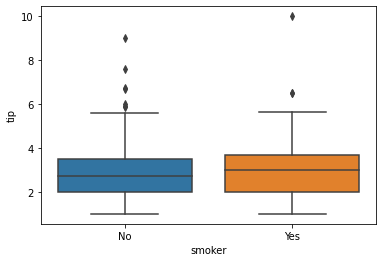

In [27]:
sns.boxplot(x='smoker',y='tip', data=cust_tip_df)

In [28]:
cust_tip_df.groupby('smoker').agg(Tip_Median=('tip','median'))

,Tip_Median
smoker,
No,2.74
Yes,3.00


Median is used as the data has outliers. The median tips of smokers are higher than non-smokers. Hence Smokers tend to tip more than non-smokers.

Non-smokers are more likely to make extremely high tips.

### 17.Create a Pivot table with sex and smokers with their average tip amount

In [29]:
summary_df = cust_tip_df.groupby(['sex','smoker'],as_index=False).agg(AvgTipAmount=('tip','mean'))
summary_df.pivot(index='sex', columns='smoker')

AvgTipAmount          
smoker           No       Yes
sex                          
Female     2.773519  2.931515
Male       3.113402  3.051167

The avg tip of non-smoker male is the highest. Hence non-smoker Male is likely to tip more.

The average tip of non-smoker female is the lowest. Hence non-smoker Female is likely to tip less.

### 18. Compute the tips per person for each observation (tips/size)

In [30]:
cust_tip_df['tip_per_person'] = cust_tip_df['tip']/cust_tip_df['size']
cust_tip_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500


### 19. Compute the kurtosis value of each numerical variable and comment about it

In [31]:
num_data.kurtosis()

total_bill    1.218484
tip           3.648376
size          1.731700
dtype: float64

Tips has heavier tails (kurtosis>3) indicating leptokurtic. 

Total bill and size have lighter tails (kurtosis < 3) indicating platokurtic

### 20. Check whether how many percentage of data is exist in between +/-1 sigma from the mean of the column total_bill

In [32]:
bill_std = cust_tip_df['total_bill'].std()
bill_mean = cust_tip_df['total_bill'].mean()
minus_one_sigma = bill_mean - bill_std
plus_one_sigma = bill_mean + bill_std
noofcusts = cust_tip_df[(cust_tip_df.total_bill>=minus_one_sigma)&(cust_tip_df.total_bill<=plus_one_sigma)].shape[0]
total_noofcusts = cust_tip_df.shape[0]
pct = noofcusts/total_noofcusts*100
print("%.1f%% of customers have total bill between +1 Sigma %.1f and -1 Sigma %.1f" %(pct, minus_one_sigma, plus_one_sigma))

72.1% of customers have total bill between +1 Sigma 10.9 and -1 Sigma 28.7
